#1. Load a Dataset:

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [9]:
# Load the Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Loaded:")
print(X.head())  # Display first few rows of the dataset

Dataset Loaded:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0  

#2. Split the Data:

In [10]:
from sklearn.model_selection import train_test_split

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Split into Training and Testing Sets.")

Data Split into Training and Testing Sets.


#3. Baseline Model (No PCA):



In [11]:
# Train a Logistic Regression model on the raw data (No PCA)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Evaluate performance on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Baseline Model (No PCA) - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Baseline Model (No PCA) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


#4. Apply PCA:



In [12]:
# Apply PCA, keeping different numbers of components
pca_components = [2, 5, 10]  # You can adjust the number of components here

for n_components in pca_components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(f"PCA with {n_components} Components Applied.")

PCA with 2 Components Applied.
PCA with 5 Components Applied.
PCA with 10 Components Applied.


#5. Train and Evaluate:

In [13]:
# Train and evaluate the Logistic Regression model after applying PCA
for n_components in pca_components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train model on the reduced data
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_pca, y_train)

    # Evaluate performance
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
    recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

    print(f"Model with {n_components} PCA Components - Accuracy: {accuracy_pca:.4f}, Precision: {precision_pca:.4f}, Recall: {recall_pca:.4f}")

Model with 2 PCA Components - Accuracy: 0.6852, Precision: 0.6653, Recall: 0.6852
Model with 5 PCA Components - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
Model with 10 PCA Components - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


#6. Visualization:



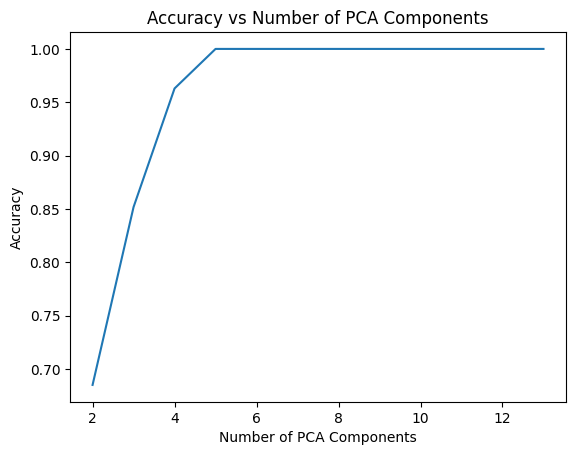

In [14]:
# Evaluate accuracy for different numbers of PCA components
pca_components = range(2, 14)  # Components from 2 to 13
accuracies = []

for n_components in pca_components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_pca, y_train)

    y_pred_pca = model.predict(X_test_pca)
    accuracies.append(accuracy_score(y_test, y_pred_pca))

# Plotting accuracy vs number of PCA components
plt.plot(pca_components, accuracies)
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of PCA Components')
plt.show()

#How does the number of components affect model performance?

As the number of PCA components increases, the accuracy tends to increase as well, but after a certain number of components (in this case, around 5 components), the accuracy reaches its maximum and plateaus. Adding more components beyond this point does not improve accuracy further.

#Is there a point where adding more components doesn’t improve accuracy?

Yes, after a certain number of components (around 5 in this case), the accuracy stabilizes at its maximum value. Adding more components beyond this point does not improve model performance.